In [3]:
import torch # pytorch basic package
from torch import nn # neural net 
from torch.utils.data import DataLoader, Dataset # to work with data
from torchvision.transforms import ToTensor # to convert nparrays/images into pytorch tensors
from torchvision.io import read_image
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
import os
from glob import glob

In [4]:
str_to_label = {
    "dog": 0,
    "cat": 1
}

## Define our custom dataset

In [10]:
class CatsAndDogsDataset(Dataset):
    def __init__(self, img_dir, train=True, transform=None):
        self.img_paths = glob(os.path.join(img_dir, "train/*.jpg")) if train else glob(os.path.join(img_dir, "validation/*.jpg"))
        self.labels = [str_to_label[os.path.basename(img).split('.')[0]] for img in self.img_paths]
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = read_image(self.img_paths[idx])
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [21]:
ds_train = CatsAndDogsDataset("data/cats_and_dogs_filtered", train=True)
ds_test = CatsAndDogsDataset("data/cats_and_dogs_filtered", train=False)

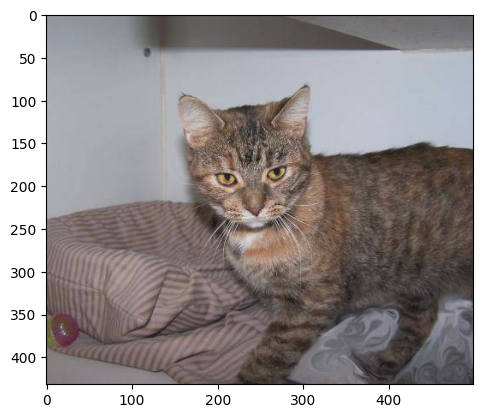

In [22]:
plt.imshow(ds_train[6][0].permute(1,2,0))
plt.show()

## Dataset with a different annotation format

In [56]:
class CatsAndDogsDatasetv2(Dataset):
    def __init__(self, img_dir, train=True, transform=None):
        self.img_paths = glob(os.path.join(img_dir, "train/*.jpg")) if train else glob(os.path.join(img_dir, "validation/*.jpg"))
        self.label_csv = pd.read_csv(os.path.join(img_dir, "train.csv"), delimiter=",", header=None) if train else pd.read_csv(os.path.join(img_dir, "validation.csv"), delimiter=",", header=None)
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = read_image(self.img_paths[idx])
        label = self.label_csv[self.label_csv[0] == os.path.basename(self.img_paths[idx])][1].item()
        if self.transform:
            image = self.transform(image)
        return image, label

In [57]:
ds = CatsAndDogsDatasetv2("data/cats_and_dogs_filtered", train=True)

(tensor([[[134, 133, 133,  ..., 179, 180, 180],
         [134, 133, 133,  ..., 179, 180, 180],
         [134, 133, 133,  ..., 178, 178, 178],
         ...,
         [ 63,  65,  69,  ...,  49,  49,  49],
         [ 56,  58,  61,  ...,  55,  55,  55],
         [ 53,  55,  58,  ...,  53,  53,  53]],

        [[109, 108, 108,  ..., 130, 129, 129],
         [109, 108, 108,  ..., 130, 129, 129],
         [109, 108, 108,  ..., 129, 129, 129],
         ...,
         [ 39,  41,  42,  ...,  32,  32,  32],
         [ 32,  34,  34,  ...,  38,  38,  38],
         [ 29,  31,  31,  ...,  36,  36,  36]],

        [[ 79,  78,  78,  ...,  63,  63,  63],
         [ 79,  78,  78,  ...,  63,  63,  63],
         [ 79,  78,  78,  ...,  62,  62,  62],
         ...,
         [ 27,  29,  31,  ...,  24,  24,  24],
         [ 20,  22,  23,  ...,  30,  30,  30],
         [ 17,  19,  20,  ...,  28,  28,  28]]], dtype=torch.uint8), 1)


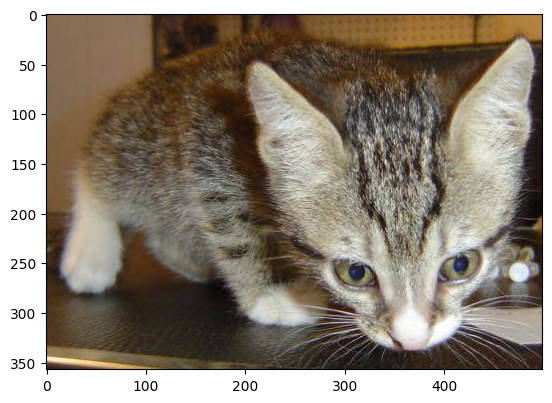

In [61]:
print(ds[7])
plt.imshow(ds[7][0].permute(1,2,0))
plt.show()

## HOMEWORK

1. Build a classification model which can handle the cats vs dogs classification task. Watch out for the number of classes (hence loss function and activation in the end) and the input image dimensions.
2. 